<a href="https://colab.research.google.com/github/guptamols/zero_to_hero_nn/blob/main/micro_grad_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### References
https://github.com/AayushSameerShah/Neural-Net-Zero-to-Hero-with-Andrej

https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b

https://medium.com/@0ssamaak0/how-open-ais-andrej-karpathy-made-one-of-the-best-tutorials-in-deep-learning-e6b6445a2d05

https://github.com/karpathy/nn-zero-to-hero/tree/master

https://colab.research.google.com/drive/11SbzRCfRAXyveiri8CJ7Bjbn4MfiyvsL#scrollTo=yk3QDMPjWyYp

https://github.com/Anri-Lombard/micrograd

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('gdrive/MyDrive/zero_to_hero_nn')

In [ ]:
! pwd

/content/gdrive/MyDrive/zero_to_hero_nn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Neural Network has inputs and weights. These inputs and weights are multiplied and then added through complicated layers.

To implement this Karpathy is demonstrating building a Value object which basically is a data structure / mathematical expression that:
- How the output was constructured. What made what
- Which operations made what e.g. * / + / tanh / sigmoid etc
- Also calculate the derivatives of the weights so that we know how much the weights need to be changed

The nn.py has 4 classes: class Module, Neuron, Layer, MLP

In [ ]:
class Value:

    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self.grad=0.0
        self._prev = set(_children)
        self._op = _op
        self.label=label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self,other):
        out = Value(self.data + other.data, (self,other),'+')
        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other),'*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t,(self,),'tanh')
        return out



a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10,label='c')
e = a *b ; e.label='e'
d = e+c; d.label='d'
f=Value(-2.0,label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

In [ ]:
d._prev

{Value(data=-6.0), Value(data=10)}

In [ ]:
d._op

'+'

In [ ]:
def build(v):
    nodes=set();edges=set()
    def traversal(v):
        #print(v) # just for demo how each node is travelled to.
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                traversal(child)
    traversal(v)
    return nodes,edges

# Good example of travelling a chain.
# Please note that traversal is called inside build & there is a recursion inside traversal also. So it travels from one node to another
# why did we not build traversal outside ?
# 1. It helps not define nodes and edges variable and return them again. So it simplifies the code

In [ ]:
nodes,edges=build(d)
print(f"nodes:{nodes}")
print(f"edges:{edges}")

nodes:{Value(data=10), Value(data=4.0), Value(data=2.0), Value(data=-6.0), Value(data=-3.0)}
edges:{(Value(data=2.0), Value(data=-6.0)), (Value(data=-6.0), Value(data=4.0)), (Value(data=10), Value(data=4.0)), (Value(data=-3.0), Value(data=-6.0))}


A little Intro to Digraph (Working Knowledge)

In [ ]:
from graphviz import Digraph

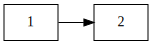

In [ ]:
dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})

dot.node(name='1',label='1',shape='record')
dot.node(name='2',label='2',shape='record')
dot.edge('1','2') # from and to
dot

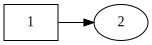

In [ ]:
# If you would not have created '2' above then too it would be created but with a default shape

dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})

dot.node(name='1',label='1',shape='record')
dot.edge('1','2') # from and to.
dot

In [ ]:
def draw_dot(exp_graph):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = build(exp_graph)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    # dot.node(name = uid, label = "{data %.4f}" % (n.data), shape='record')
    dot.node(name = uid, label = f"{n.label} | data:{n.data:.4f} | grad:{n.grad:.4f}", shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

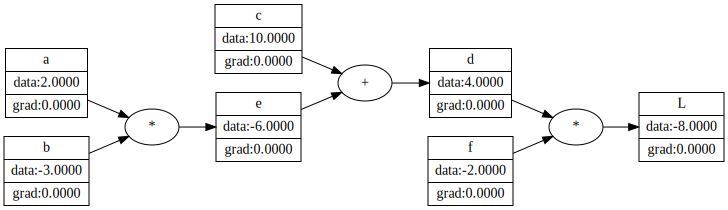

In [ ]:
draw_dot(L)

**Chain Rule**

Intuitively, the chain rule states that knowing the instantaneous rate of change of z relative to y and that of y relative to x allows one to calculate the instantaneous rate of change of z relative to x as the product of the two rates of change.

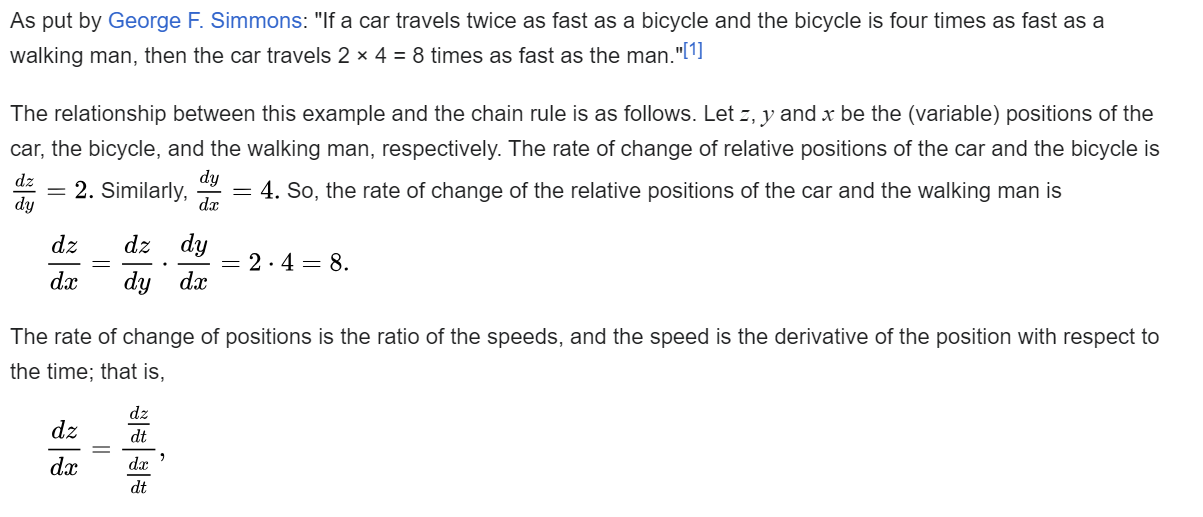

In [ ]:
def lol():
    '''creating a function so it doesnt mess with notebook variables'''

    h = 0.0001

    a = Value(2.0,label='a')
    b = Value(-3.0,label='b')
    c = Value(10,label='c')
    e = a *b ; e.label='e'
    d = e+c; d.label='d'
    f=Value(-2.0,label='f')
    L = d * f; L.label='L'
    L1=L.data

    a = Value(2.0,label='a')
    b = Value(-3.0,label='b')
    c = Value(10,label='c')
    e = a *b ; e.label='e'
    d = e+c; d.label='d'
    f=Value(-2.0,label='f')
    L = d * f; L.label='L'
    L2=L.data+h

    print((L2-L1)/h)

lol()

0.9999999999976694


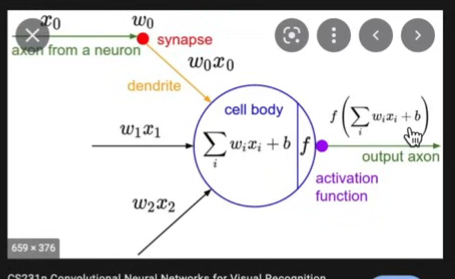

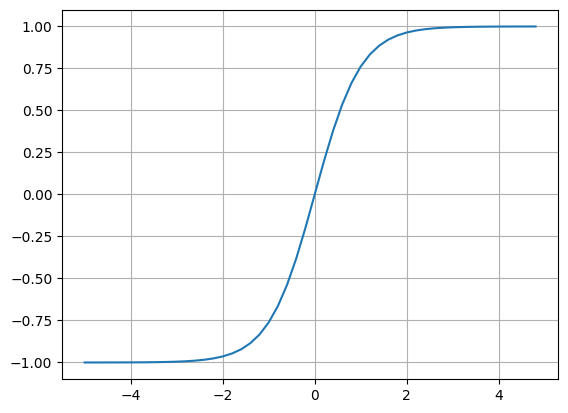

In [ ]:
x=np.arange(-5,5,0.2)
y=np.tanh(x)
plt.plot(x,y) ; plt.grid()

In [ ]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1=Value(-3.0,label='w1')
w2=Value(-3.0,label='w2')

b=Value(6.88137,label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'

x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label= 'w1w1 + x2w2'
n = x1w1x2w2 + b ; n.label = 'n'

o = n.tanh() ; o.label='o'

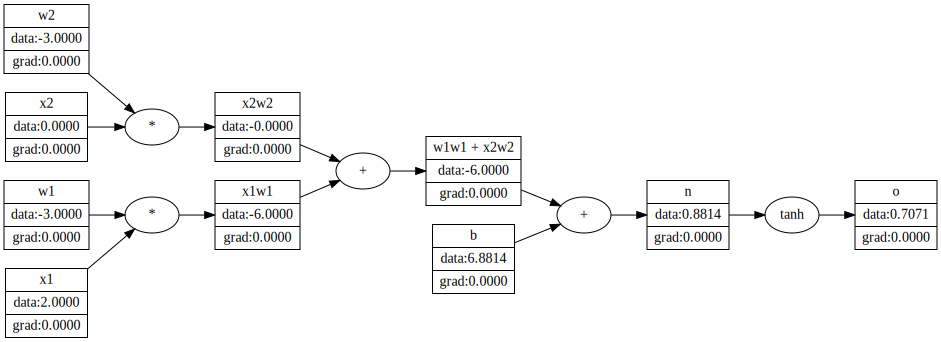

In [ ]:
draw_dot(o)

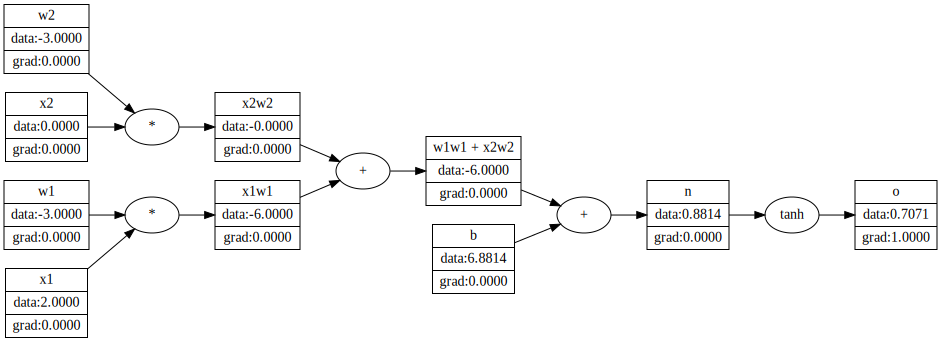

In [ ]:
o.grad = 1.0
draw_dot(o)

In [ ]:
# do / dn = 1 - tanh(o)**2
1 - 0.7071**2

0.5000095900000001

In [ ]:
n.grad=0.5000095900000001

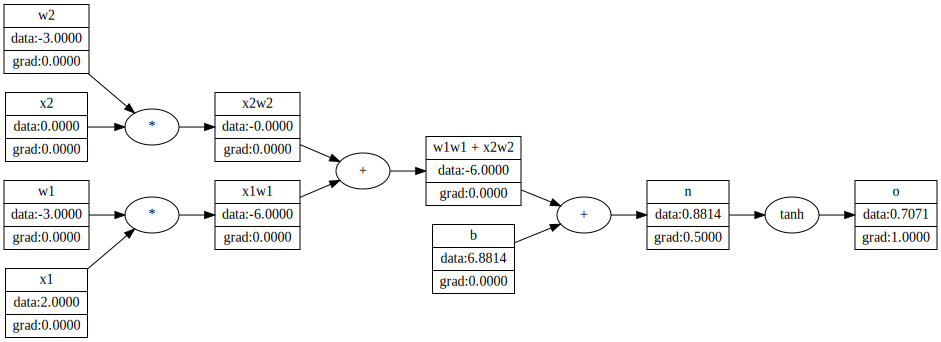

In [ ]:
draw_dot(o)

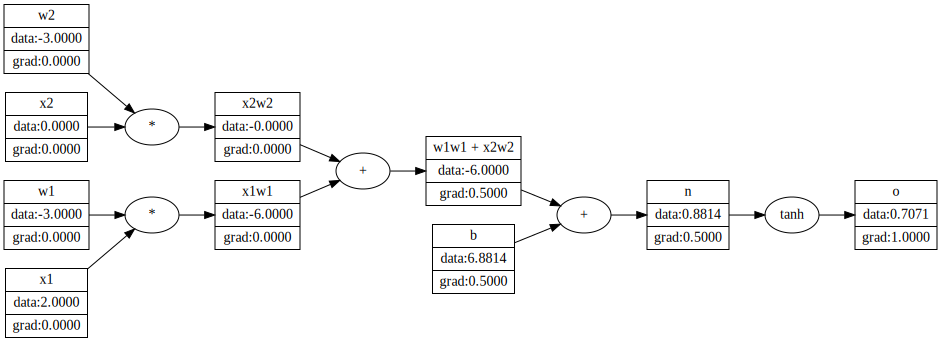

In [ ]:
x1w1x2w2.grad = 0.5
b.grad = 0.5
draw_dot(o)

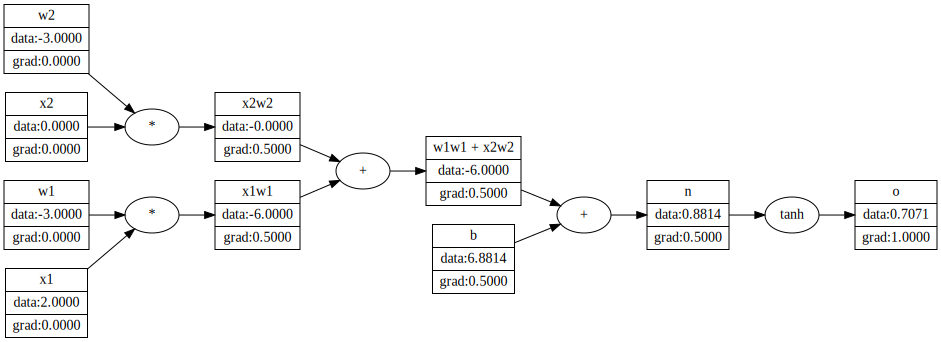

In [ ]:
x2w2.grad=0.5
x1w1.grad=0.5
draw_dot(o)

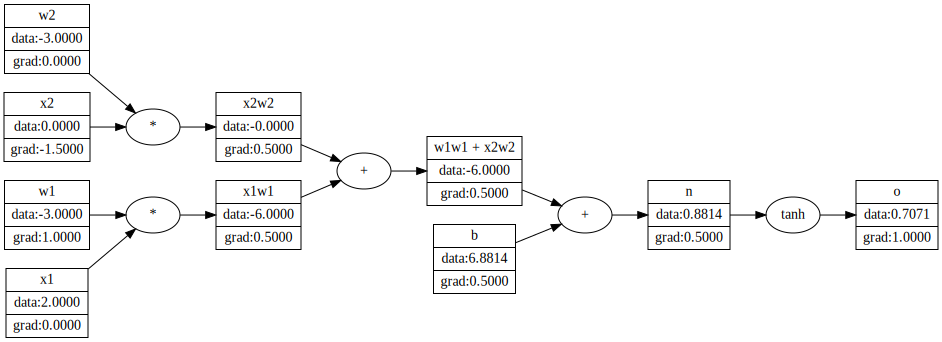

In [ ]:
x1.grad = 0.5 * w1.grad
w1.grad = 0.5 * 2

x2.grad = 0.5 * w2.data
w2.grad = 0.5 * x2.data

draw_dot(o)

Implementing Backward Pass and other methods e.g. TrueDiv, Power etc

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [ ]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1=Value(-3.0,label='w1')
w2=Value(-3.0,label='w2')

b=Value(6.88137,label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'

x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label= 'w1w1 + x2w2'
n = x1w1x2w2 + b ; n.label = 'n'

o = n.tanh() ; o.label='o'

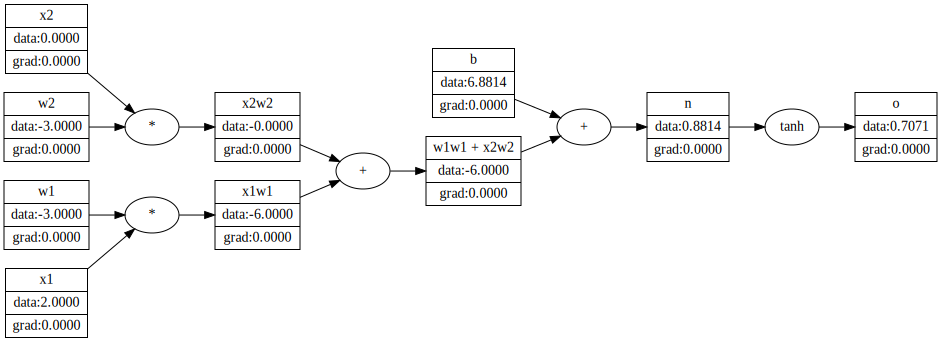

In [ ]:
draw_dot(o)

In [ ]:
o.backward()

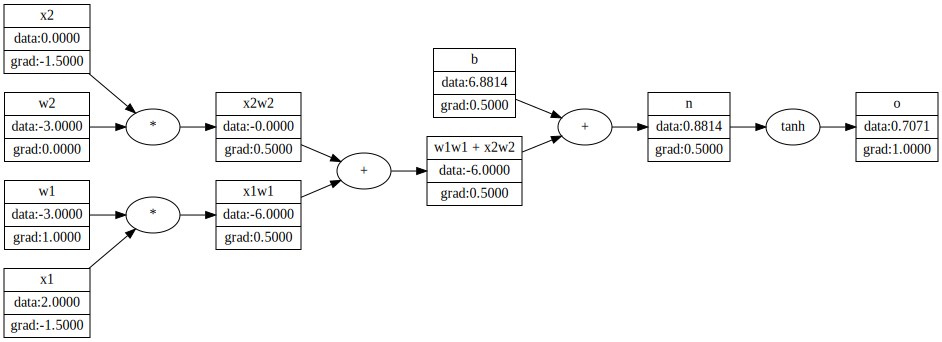

In [ ]:
draw_dot(o)

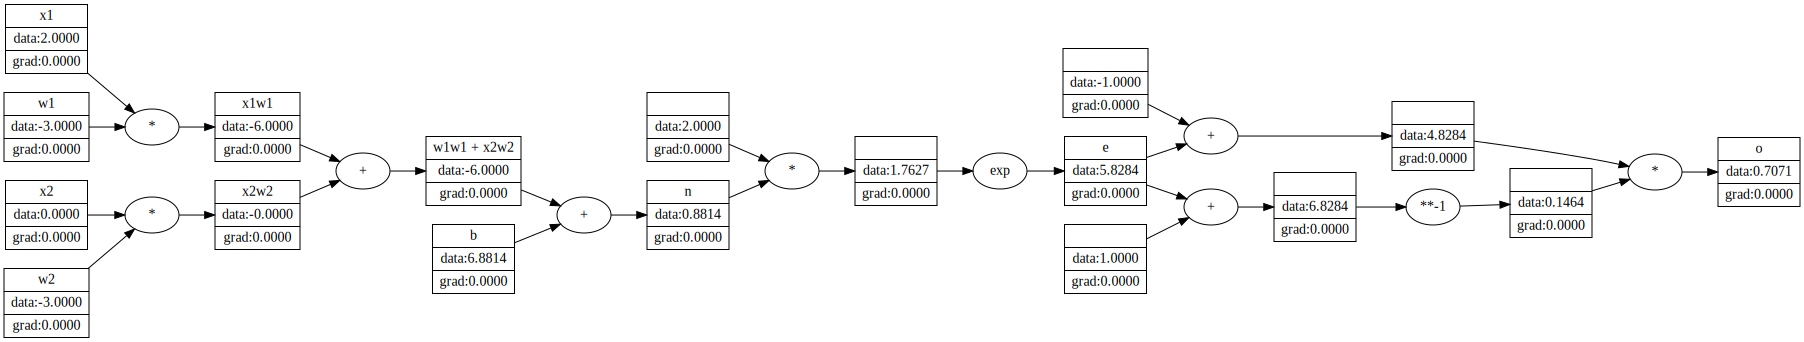

In [ ]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1=Value(-3.0,label='w1')
w2=Value(-3.0,label='w2')

b=Value(6.88137,label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'

x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label= 'w1w1 + x2w2'
n = x1w1x2w2 + b ; n.label = 'n'

e = (2*n).exp() ; e.label='e'
o = (e-1)/(e+1); o.label='o'

draw_dot(o)